In [84]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import IQP
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

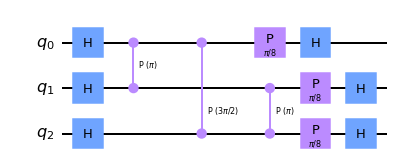

In [85]:
m = 'mpl'
qc = IQP([[1,2,3],
          [2,1,2],
          [3,2,1]])
qc.decompose().draw(m)

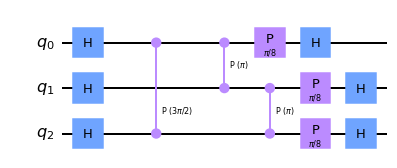

In [88]:
def IQP(int_mat):
    n = len(int_mat[0][:])
    
    for i in range(n):
        for j in range(n-1, i, -1):
            if(int_mat[i][j] != int_mat[j][i]):
                print("Not a symmetrical interaction matrix!")
                return
    
    qc = QuantumCircuit(n)
    qc.h(range(n))
    
    for i in range(n):
        for j in range(n-1, i, -1):
            x = int_mat[i][j]
            qc.cp(np.pi/2*x, i, j)
    
    for i in range(n):
        qc.p(np.pi/8*int_mat[i][i], i)
        
    qc.h(range(n))
 
    return qc

qc = IQP([[1,2,3],
          [2,1,2],
          [3,2,1]])

qc.draw(m)